In [1]:
import visionloader as vl
import numpy as np
import matplotlib.pyplot as plt

('stixel_size', 'refresh_time', 'sta_offset', 'red', 'red_error', 'green', 'green_error', 'blue', 'blue_error')


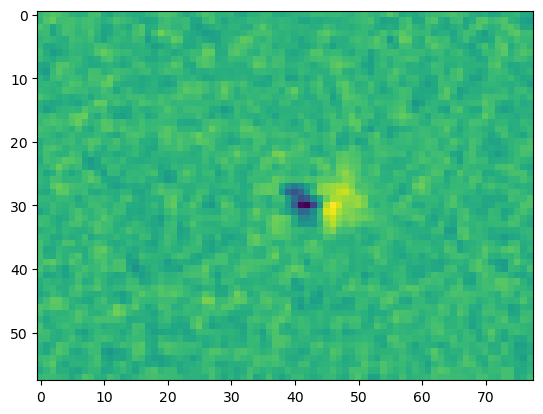

In [16]:
def load_sta_for_cells(vcd: vl.VisionCellDataTable, str_path, str_dataset, ls_ids):
    # Modified from visionloader STAReader chunked_load_all_stas method
    ret_dict = {}
    n_cells_to_load = len(ls_ids)
    with vl.STAReader(str_path, str_dataset, 'sta') as self:
        all_ids = np.array(self.cell_id_in_file_order)
        for i in range(0, n_cells_to_load):
            i = np.where(all_ids == ls_ids[i])[0][0]
            idx = all_ids[i]
            byte_offsets_to_load = np.array(self.sorted_jt_byte_offsets[i])
            n_bytes_to_read = self.n_bytes_per_sta
            # jump to the cell location in data file
            self.sta_fp.seek(byte_offsets_to_load, 0)
            chunked_bytes = self.sta_fp.read(n_bytes_to_read)
            chunk_offset = 0
            chunk_high = chunk_offset + self.n_bytes_per_sta
            ret_dict[idx] = self._unpack_single_sta_from_buffer(chunked_bytes[0:chunk_high])
    vcd.add_sta_from_loaded_sta_dict(ret_dict)

# Load vcd from analysis path
str_path = '/Volumes/Vyom MEA/analysis/20220531C/chunk1/kilosort2/'
vcd = vl.load_vision_data(str_path, 'kilosort2', include_neurons=True, include_params=True)
# Get STA for cells 2 and 3
ls_cells = [156, 503]
load_sta_for_cells(vcd, str_path, 'kilosort2', ls_cells)

# The sta is stored in vcd.main_datatable[2]['STAraw'].red, .green, and .blue. We can load with method.
sta = vcd.get_sta_for_cell(ls_cells[1])
print(sta._fields)
plt.imshow(sta.red[:,:,54])